In [1]:
import pandas as pd
import numpy as np
from numpy import *
import os
import sys
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Modified data.csv')

In [3]:
def convert_temp(tem):
    try:
        ans = float(tem)
        return ans
    except:
        return np.nan

In [4]:
df['TEMPRETURE'] = df['TEMPRETURE'].map(convert_temp)
# df_weather['DEW'] = df_weather['DEW'].map(convert_temp)

In [5]:
df.replace('- -', '')
df.dropna()
#df =  df.apply(pd.to_numeric)
for column in df:
    df[column] = df[column].map(convert_temp)

In [6]:
list(df.columns.values)

['TIME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'day_of_week',
 'weeekday',
 'date',
 'month',
 'TEMPRETURE',
 'DEW',
 'PRECIPITATION',
 'RH',
 'WIND SPD',
 'WIND DIR']

In [7]:
features = ['TIME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'day_of_week',
 'weekday',
 'date',
 'month',
 'TEMPRETURE',
 'DEW',
 'PRECIPITATION',
 'RH',
 'WIND SPD',
 'WIND DIR']

In [8]:
features1 = [ 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST KILLED']

In [9]:
where_are_NaNs = isnan(df)
df[where_are_NaNs] = 0

In [10]:
from sklearn.preprocessing import StandardScaler
features = list(df.columns.values)
# Separating out the features
x = df.loc[:, features1].values
# Separating out the target
y = df.loc[:,['CONTRIBUTING FACTOR VEHICLE 1']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [11]:
where_are_NaNs = isnan(x)
x[where_are_NaNs] = 0

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [13]:
finalDf = pd.concat([principalDf, df[['CONTRIBUTING FACTOR VEHICLE 1']]], axis = 1)

In [14]:
finalDf = finalDf.round(4)

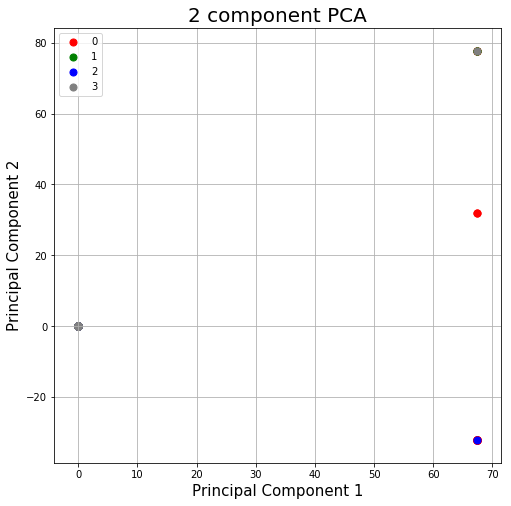

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'grey']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CONTRIBUTING FACTOR VEHICLE 1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()